# Random Seed Experiment Results

In [10]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from db import conn

In [2]:
%matplotlib inline

In [47]:
sns.set_style("whitegrid")

In [7]:
cursor = conn.cursor()
experiment_rows = [r for r in cursor.execute("""
    select g.name, args, dev_metric, test_metric from experiments e
    join experiment_groups g on e.group_id=g.gid
    where g.name=?""", ('random-seed-test',))]

In [9]:
len(experiment_rows)

30

In [43]:
experiment_results = {
    'trecqa': [],
    'wikiqa': [],
    'sick': []
}

for row in experiment_rows:
    args = json.loads(row[1])
    dev_metrics = json.loads(row[2])
    test_metrics = json.loads(row[3])
    dataset = args['dataset']
    
    res_base = {
        'dataset': dataset,
        'seed': args['seed']
    }
    
    results = []
    
    if dataset in ('trecqa', 'wikiqa'):
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'MAP', 'metric_val': dev_metrics['map']}})
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'MRR', 'metric_val': dev_metrics['mrr']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'MAP', 'metric_val': test_metrics['map']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'MRR', 'metric_val': test_metrics['mrr']}})
    elif dataset == 'sick':
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'pearson', 'metric_val': dev_metrics['pearson']}})
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'spearman', 'metric_val': dev_metrics['spearman']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'pearson', 'metric_val': test_metrics['pearson']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'spearman', 'metric_val': test_metrics['spearman']}})
    
    experiment_results[dataset].extend(results)

In [44]:
trecqa = pd.DataFrame(experiment_results['trecqa'])
wikiqa = pd.DataFrame(experiment_results['wikiqa'])
sick = pd.DataFrame(experiment_results['sick'])

In [45]:
trecqa.head(5)

,dataset,metric_name,metric_val,seed,split
0,trecqa,MAP,0.7700,846249,dev
1,trecqa,MRR,0.8106,846249,dev
2,trecqa,MAP,0.7740,846249,test
3,trecqa,MRR,0.8258,846249,test
4,trecqa,MAP,0.7909,118095,dev


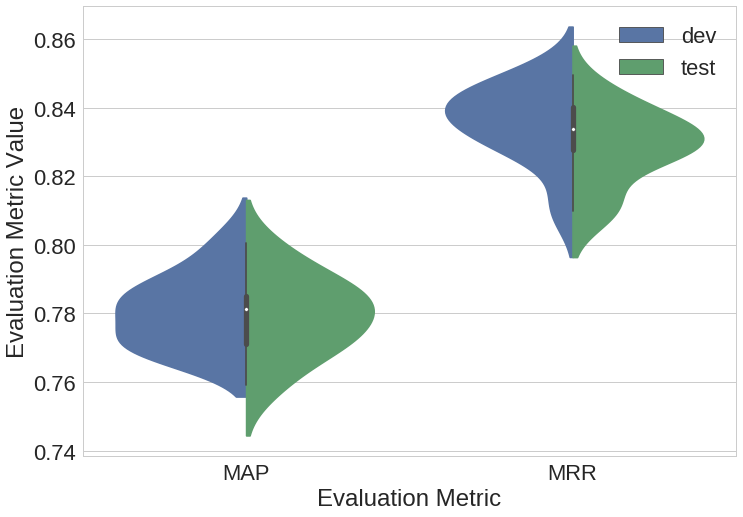

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x='metric_name', y='metric_val', hue='split', split=True, scala='count', data=trecqa, ax=ax)
# ax.set(xlabel='', ylabel='Evaluation Metric Value', fontsize=40)
plt.xlabel('Evaluation Metric', fontsize=24)
plt.ylabel('Evaluation Metric Value', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(prop={'size': 22})
fig.savefig('random_seed_mpcnn_trecqa.pdf')